In [26]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from RNN.models import EncoderDecoderGRU
from utils import normalize, denormalize, plot_profile, profile_predict, plot_prediction, behavior_prediction


#### Misc

In [49]:
curve_dir= {}
curve_dir[1] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/1/1_4_0_0.csv"
curve_dir[2] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/2/2_4_0_0.csv"
curve_dir[3] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/3/3_4_0_0.csv"
curve_dir[4] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/4/4_4_0_0.csv"
curve_dir[5] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/5/5_4_0_0.csv"
curve_dir[6] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/6/6_4_0_0.csv"

pretrained_weights = "/home/mazin/Projects/Thesis/RNN/outputs/silvery-field-185/SEFD-monitor_val-epoch=503-train_loss=0.0000711-val_loss=0.0002140-val_mae=0.01493.ckpt"
encoder_input_length = 20
decoder_input_length = 1980
current_min = -2.5
current_max = 1
voltage_min = 2.5
voltage_max = 4.2

In [3]:
rnn_model = EncoderDecoderGRU.load_from_checkpoint(pretrained_weights).to("cpu")

#### Case 0: Validation Dataset


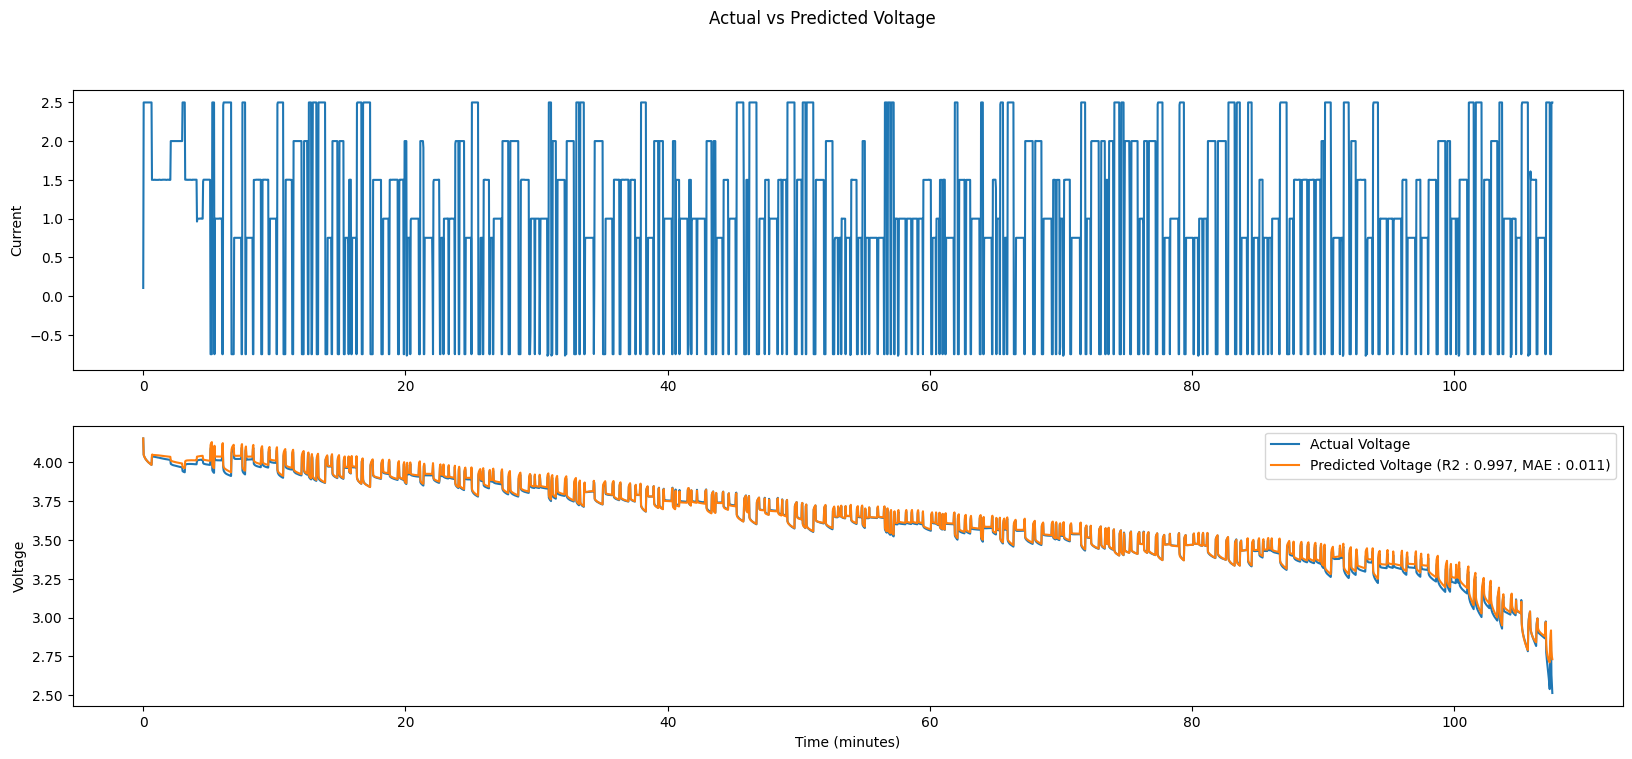

In [4]:
actual_current, actual_voltage, predicted_voltage = profile_predict(rnn_model, curve_dir[4])
plot_profile(actual_current, actual_voltage, predicted_voltage)


#### Case 1: Behavior at Rest
* Encoder current : 0
* Encoder voltage : Constant voltage
* Decoder current : 0

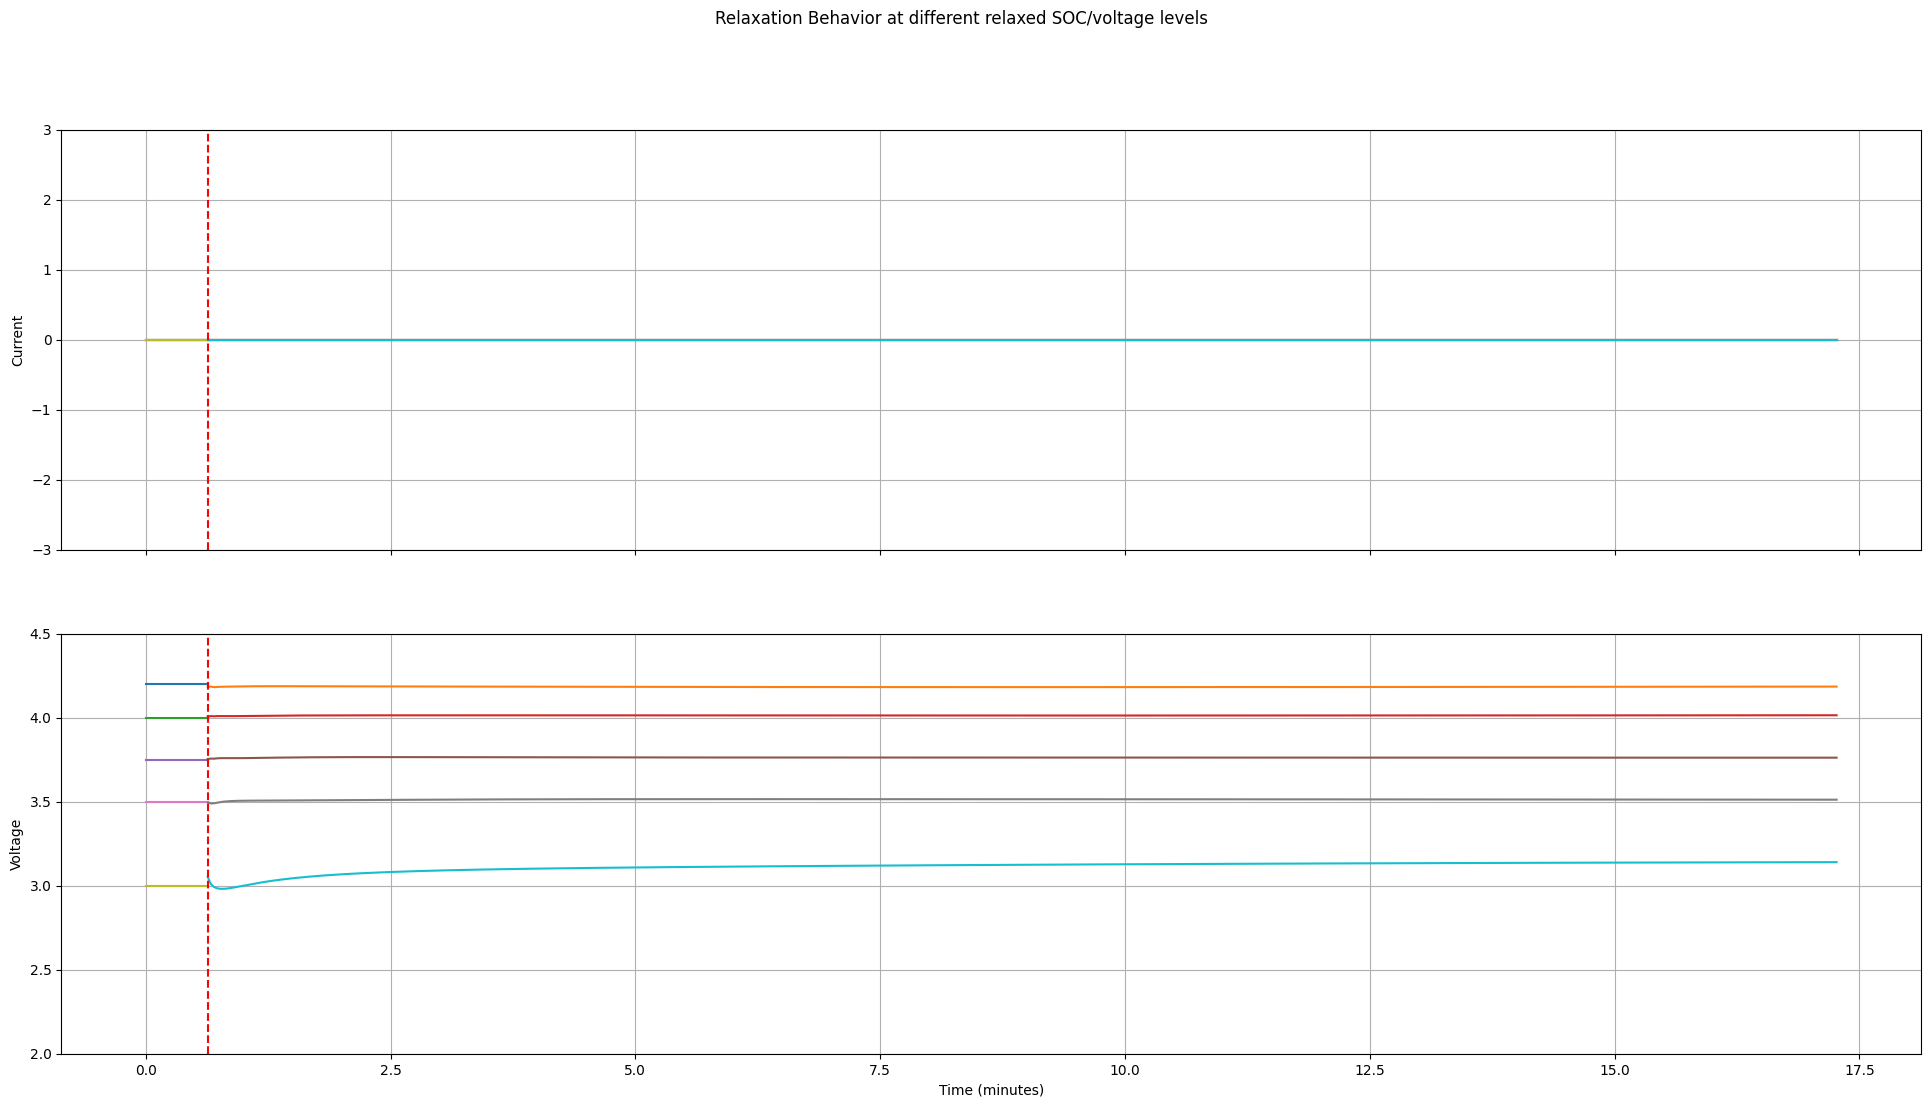

In [5]:
encoder_current_0, decoder_current_0, encoder_voltage_0, predicted_voltage_0 = behavior_prediction(rnn_model, 0, 4.2, 0, decoder_input_length=500)
encoder_current_1, decoder_current_1, encoder_voltage_1, predicted_voltage_1 = behavior_prediction(rnn_model, 0, 4.0, 0, decoder_input_length=500)
encoder_current_2, decoder_current_2, encoder_voltage_2, predicted_voltage_2 = behavior_prediction(rnn_model, 0, 3.75, 0, decoder_input_length=500)
encoder_current_3, decoder_current_3, encoder_voltage_3, predicted_voltage_3 = behavior_prediction(rnn_model, 0, 3.5, 0, decoder_input_length=500)
encoder_current_4, decoder_current_4, encoder_voltage_4, predicted_voltage_4 = behavior_prediction(rnn_model, 0, 3, 0, decoder_input_length=500)

plot_prediction([encoder_current_0, encoder_current_1, encoder_current_2, encoder_current_3, encoder_current_4],
                [decoder_current_0, decoder_current_1, decoder_current_2, decoder_current_3, decoder_current_4],
                [encoder_voltage_0, encoder_voltage_1, encoder_voltage_2, encoder_voltage_3, encoder_voltage_4],
                [predicted_voltage_0, predicted_voltage_1, predicted_voltage_2, predicted_voltage_3, predicted_voltage_4],
                title="Relaxation Behavior at different relaxed SOC/voltage levels")


#### Case 3: Behavior with +ve current
* Encoder current : 0
* Encoder voltage : Constant voltage
* Decoder current : 1

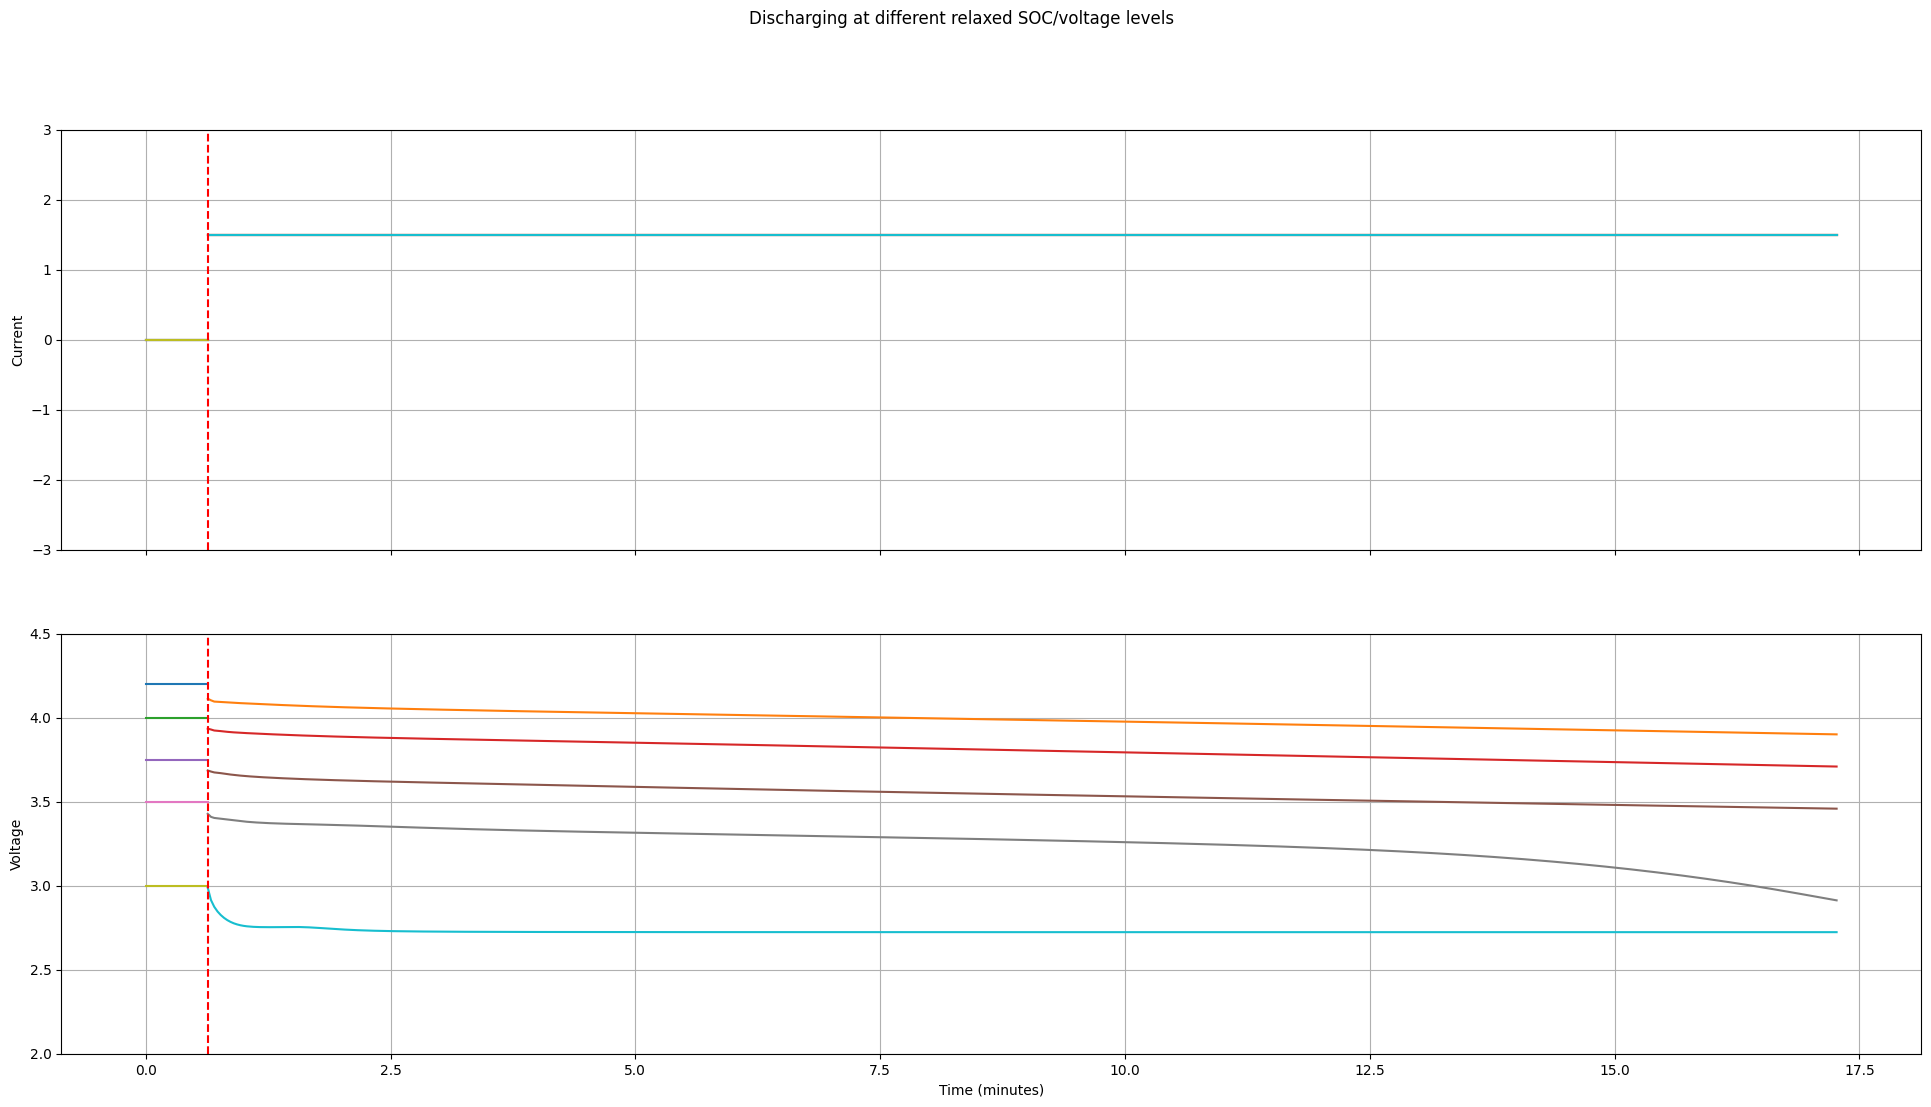

In [6]:
decoder_current_value = 1.5
encoder_current_0, decoder_current_0, encoder_voltage_0, predicted_voltage_0 = behavior_prediction(rnn_model, 0, 4.2, decoder_current_value, decoder_input_length=500)
encoder_current_1, decoder_current_1, encoder_voltage_1, predicted_voltage_1 = behavior_prediction(rnn_model, 0, 4.0, decoder_current_value, decoder_input_length=500)
encoder_current_2, decoder_current_2, encoder_voltage_2, predicted_voltage_2 = behavior_prediction(rnn_model, 0, 3.75, decoder_current_value, decoder_input_length=500)
encoder_current_3, decoder_current_3, encoder_voltage_3, predicted_voltage_3 = behavior_prediction(rnn_model, 0, 3.5, decoder_current_value, decoder_input_length=500)
encoder_current_4, decoder_current_4, encoder_voltage_4, predicted_voltage_4 = behavior_prediction(rnn_model, 0, 3, decoder_current_value, decoder_input_length=500)

plot_prediction([encoder_current_0, encoder_current_1, encoder_current_2, encoder_current_3, encoder_current_4],
                [decoder_current_0, decoder_current_1, decoder_current_2, decoder_current_3, decoder_current_4],
                [encoder_voltage_0, encoder_voltage_1, encoder_voltage_2, encoder_voltage_3, encoder_voltage_4],
                [predicted_voltage_0, predicted_voltage_1, predicted_voltage_2, predicted_voltage_3, predicted_voltage_4],
                title="Discharging at different relaxed SOC/voltage levels")


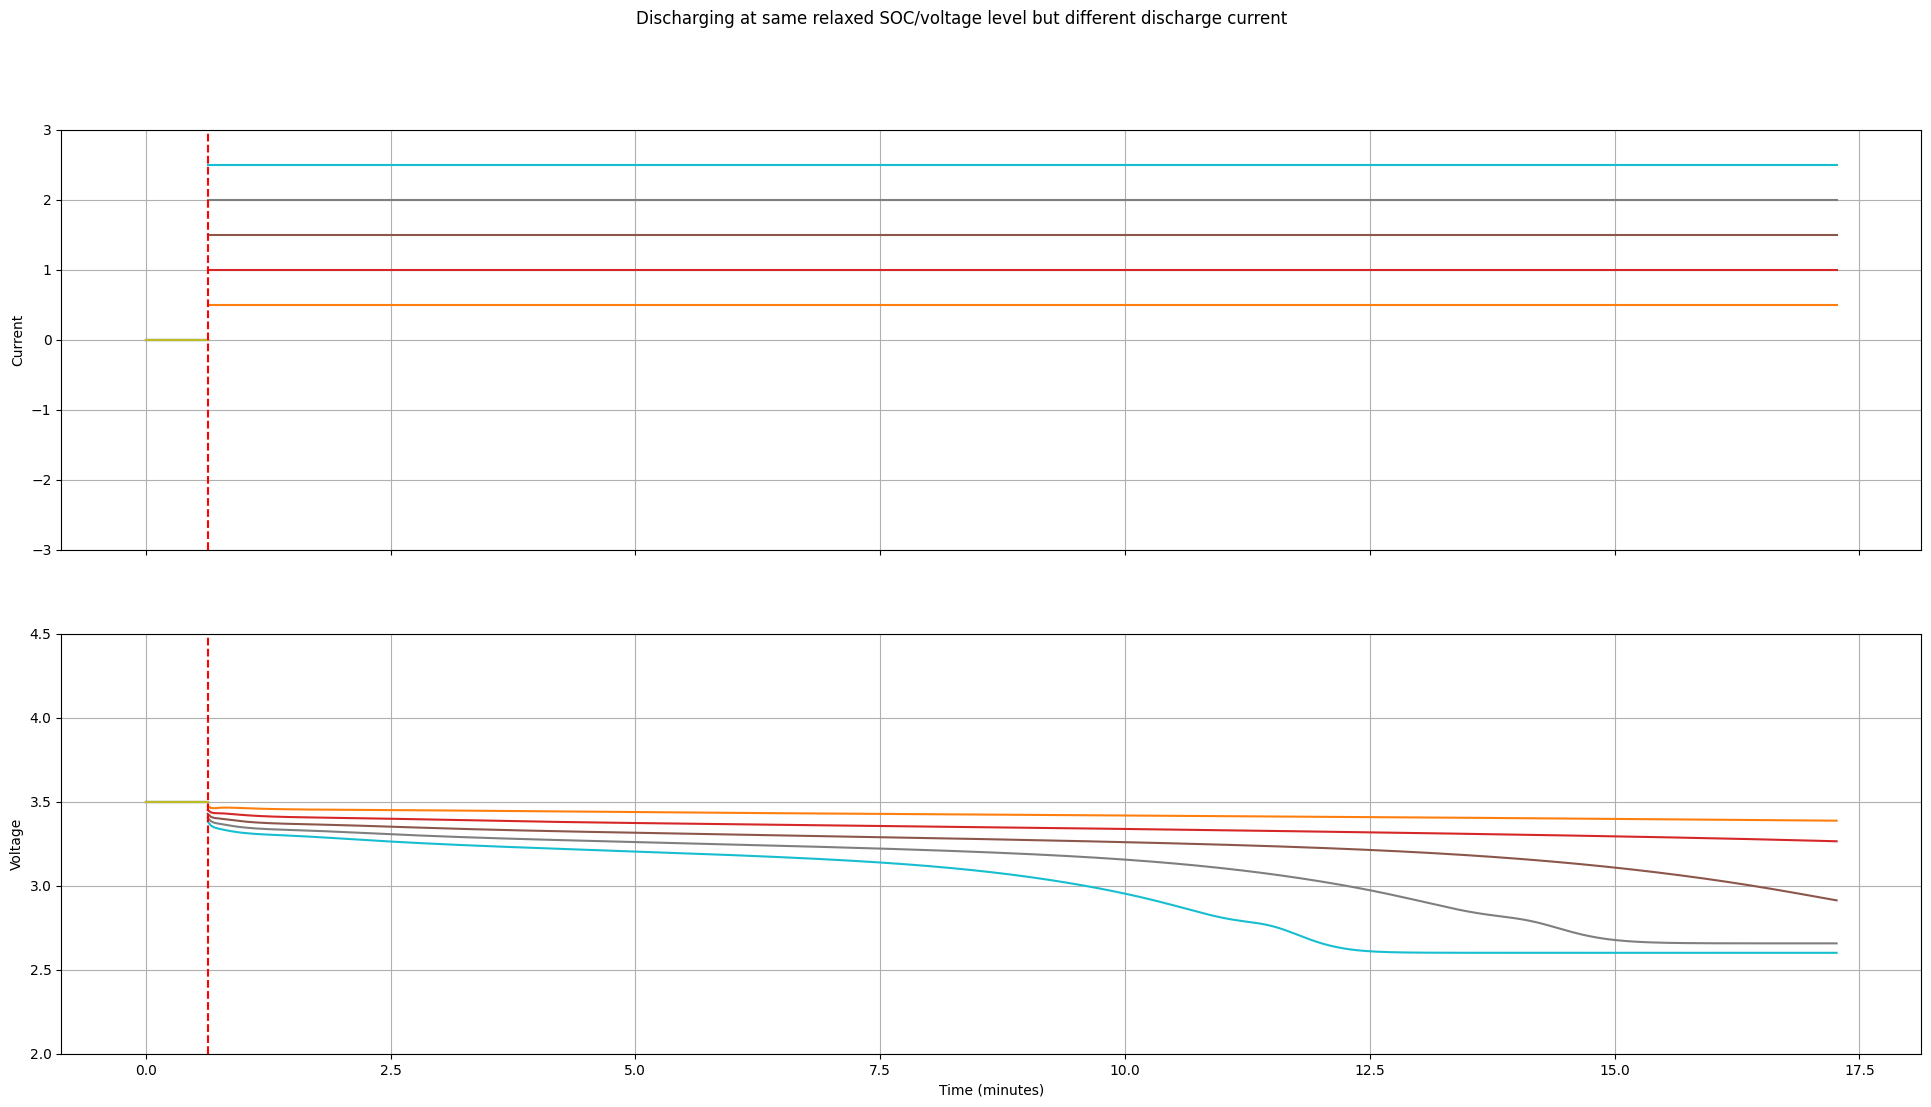

In [20]:
encoder_voltage = 3.5
encoder_current_0, decoder_current_0, encoder_voltage_0, predicted_voltage_0 = behavior_prediction(rnn_model, 0, encoder_voltage, 0.5, decoder_input_length=500)
encoder_current_1, decoder_current_1, encoder_voltage_1, predicted_voltage_1 = behavior_prediction(rnn_model, 0, encoder_voltage, 1, decoder_input_length=500)
encoder_current_2, decoder_current_2, encoder_voltage_2, predicted_voltage_2 = behavior_prediction(rnn_model, 0, encoder_voltage, 1.5, decoder_input_length=500)
encoder_current_3, decoder_current_3, encoder_voltage_3, predicted_voltage_3 = behavior_prediction(rnn_model, 0, encoder_voltage, 2, decoder_input_length=500)
encoder_current_4, decoder_current_4, encoder_voltage_4, predicted_voltage_4 = behavior_prediction(rnn_model, 0, encoder_voltage, 2.5, decoder_input_length=500)

plot_prediction([encoder_current_0, encoder_current_1, encoder_current_2, encoder_current_3, encoder_current_4],
                [decoder_current_0, decoder_current_1, decoder_current_2, decoder_current_3, decoder_current_4],
                [encoder_voltage_0, encoder_voltage_1, encoder_voltage_2, encoder_voltage_3, encoder_voltage_4],
                [predicted_voltage_0, predicted_voltage_1, predicted_voltage_2, predicted_voltage_3, predicted_voltage_4],
                title="Discharging at same relaxed SOC/voltage level but different discharge current")


#### Case 2: Behavior with -ve current
* Encoder current : 0
* Encoder voltage : Constant voltage
* Decoder current : -1

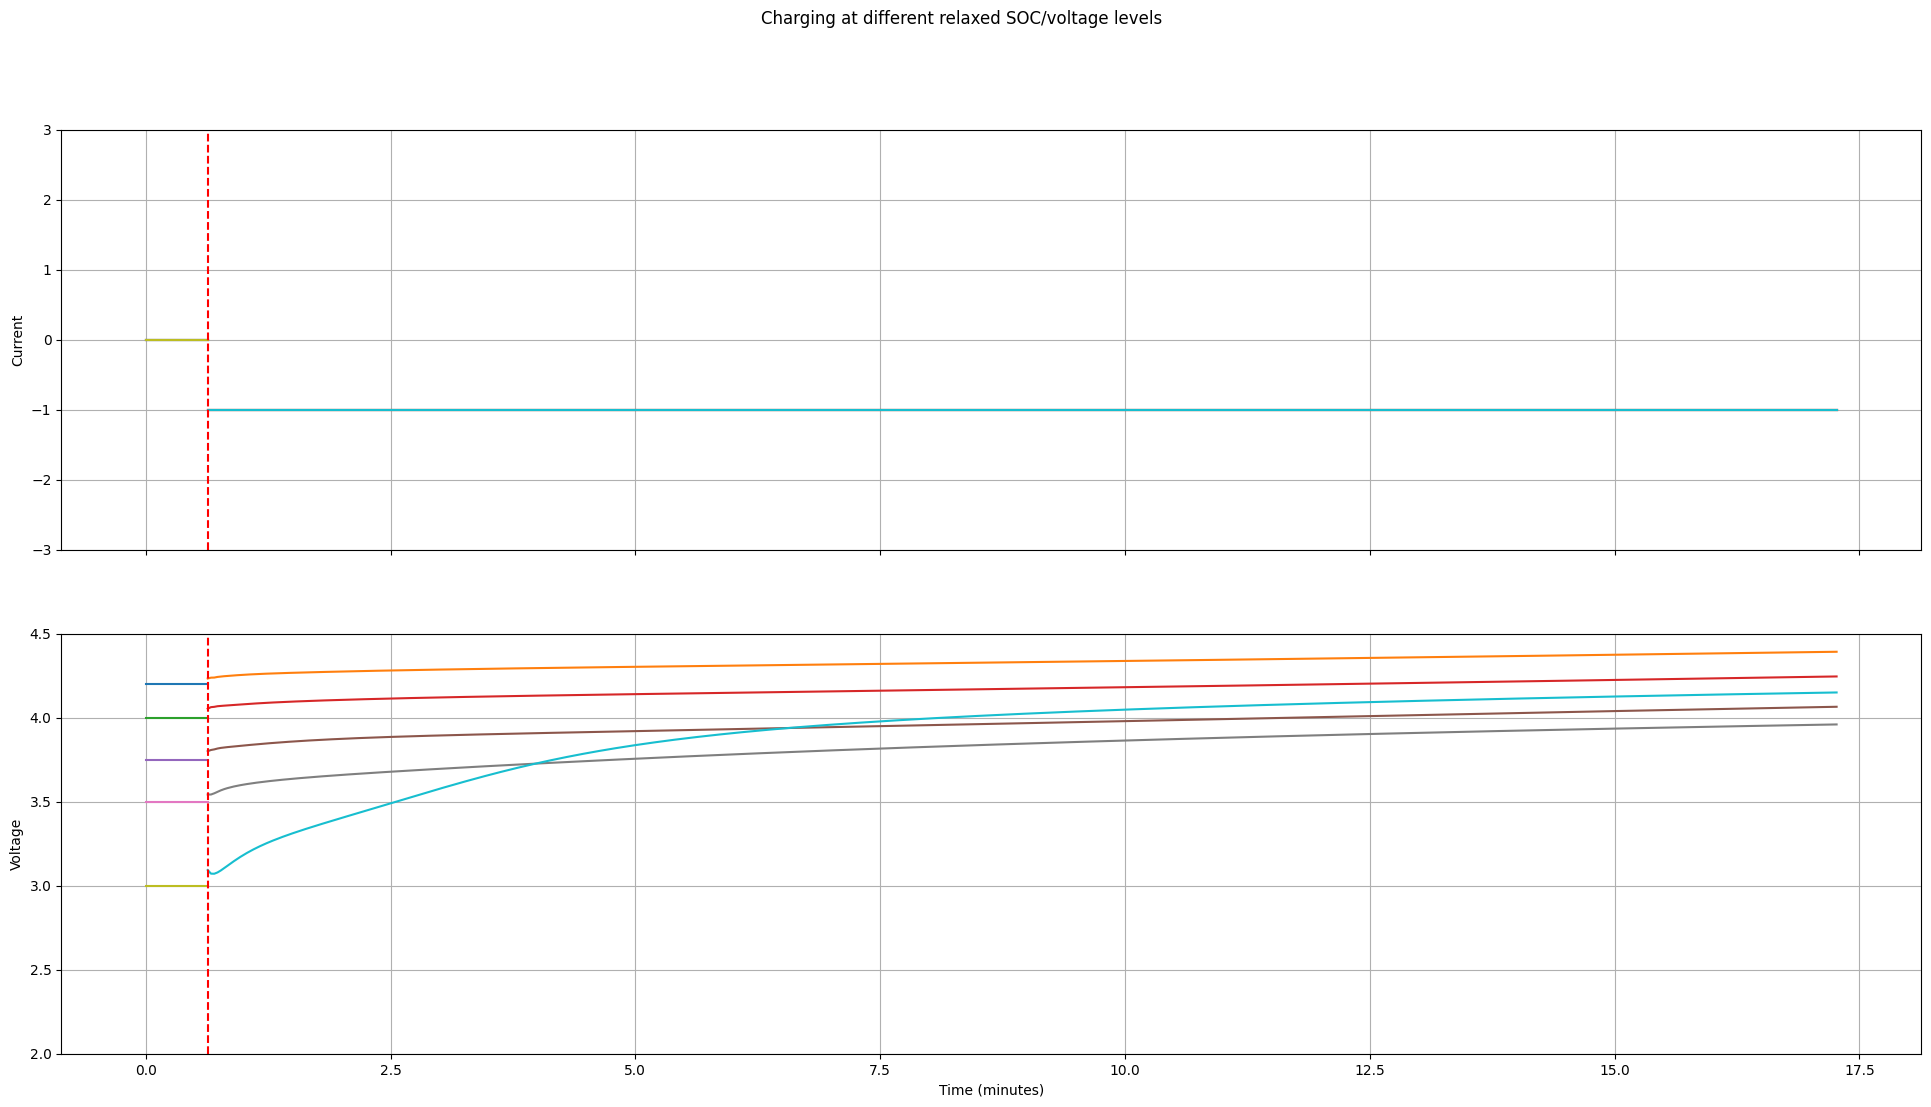

In [21]:
decoder_current_value = -1
encoder_current_0, decoder_current_0, encoder_voltage_0, predicted_voltage_0 = behavior_prediction(rnn_model, 0, 4.2, decoder_current_value, decoder_input_length=500)
encoder_current_1, decoder_current_1, encoder_voltage_1, predicted_voltage_1 = behavior_prediction(rnn_model, 0, 4.0, decoder_current_value, decoder_input_length=500)
encoder_current_2, decoder_current_2, encoder_voltage_2, predicted_voltage_2 = behavior_prediction(rnn_model, 0, 3.75, decoder_current_value, decoder_input_length=500)
encoder_current_3, decoder_current_3, encoder_voltage_3, predicted_voltage_3 = behavior_prediction(rnn_model, 0, 3.5, decoder_current_value, decoder_input_length=500)
encoder_current_4, decoder_current_4, encoder_voltage_4, predicted_voltage_4 = behavior_prediction(rnn_model, 0, 3, decoder_current_value, decoder_input_length=500)

plot_prediction([encoder_current_0, encoder_current_1, encoder_current_2, encoder_current_3, encoder_current_4],
                [decoder_current_0, decoder_current_1, decoder_current_2, decoder_current_3, decoder_current_4],
                [encoder_voltage_0, encoder_voltage_1, encoder_voltage_2, encoder_voltage_3, encoder_voltage_4],
                [predicted_voltage_0, predicted_voltage_1, predicted_voltage_2, predicted_voltage_3, predicted_voltage_4],
                title="Charging at different relaxed SOC/voltage levels")


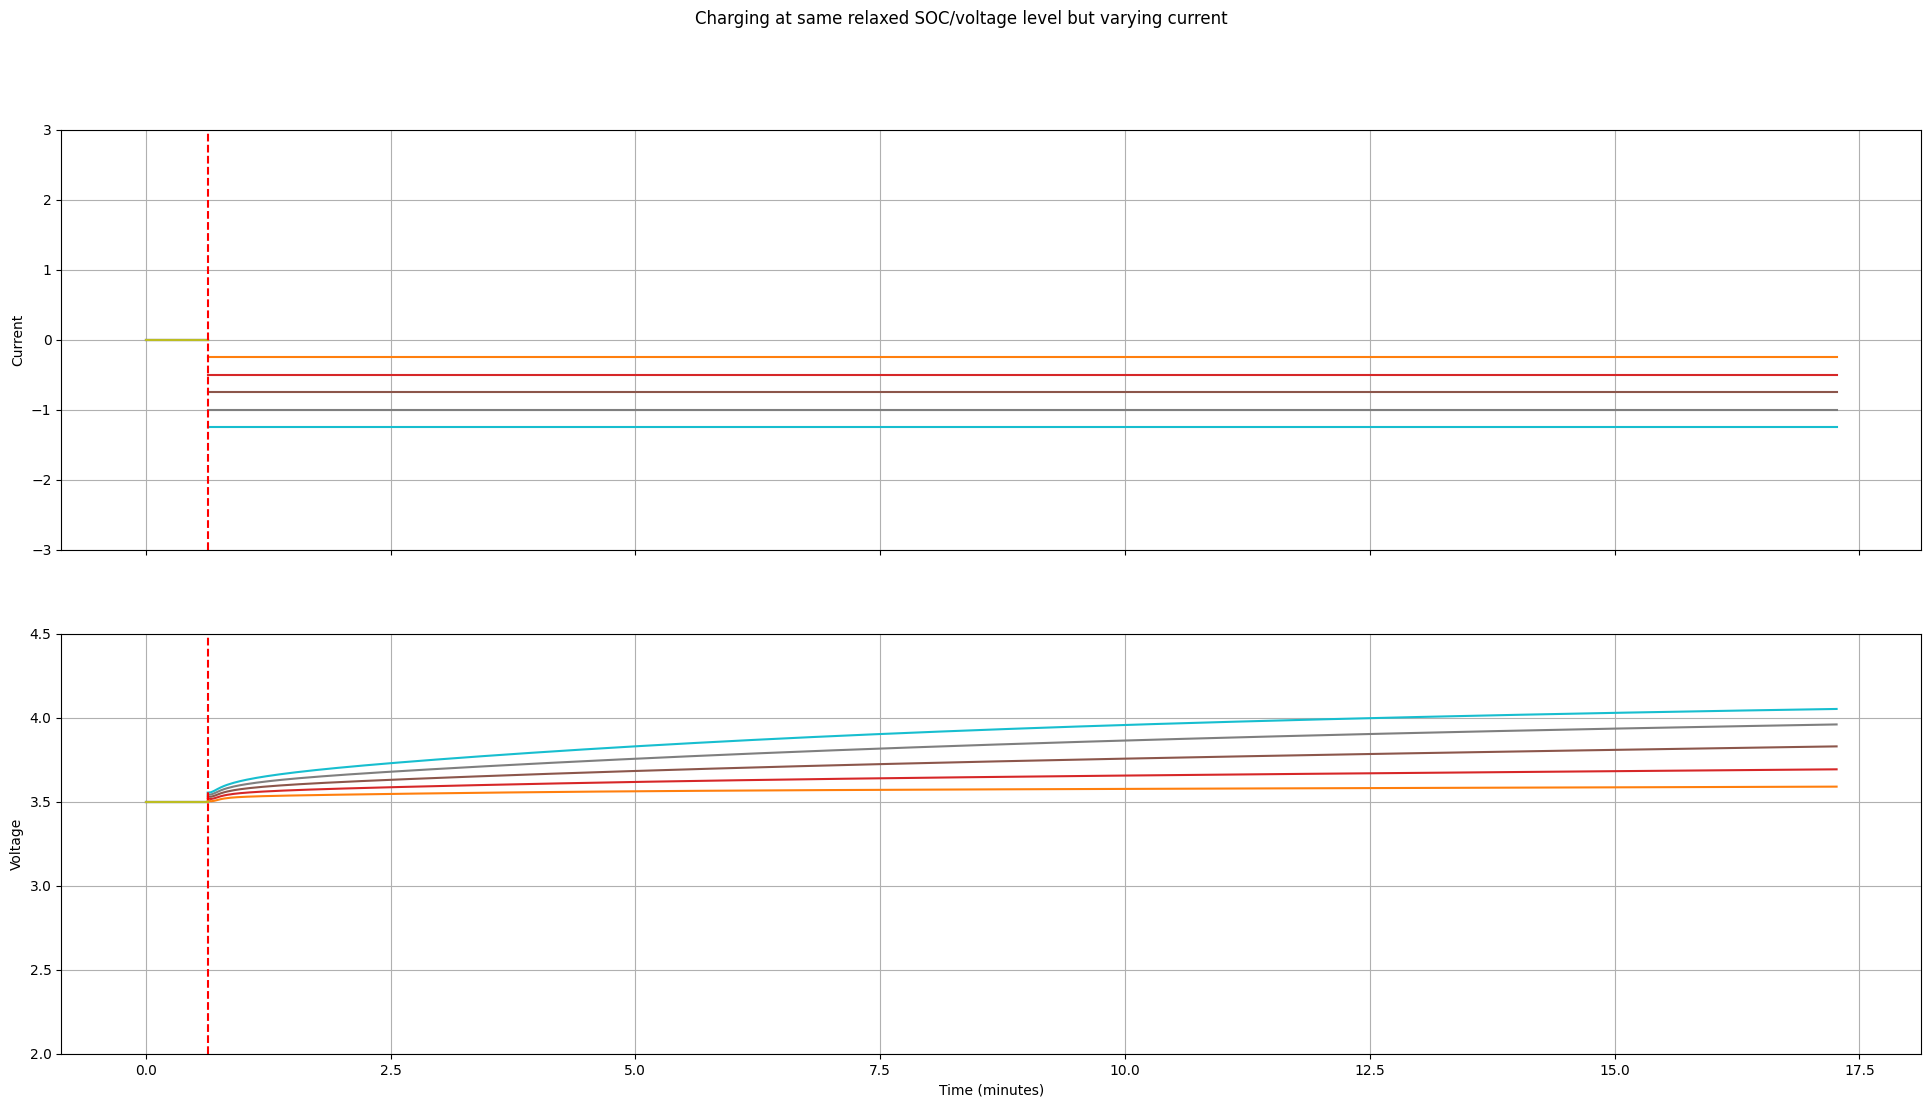

In [24]:
encoder_voltage = 3.5
encoder_current_0, decoder_current_0, encoder_voltage_0, predicted_voltage_0 = behavior_prediction(rnn_model, 0, encoder_voltage, -0.25, decoder_input_length=500)
encoder_current_1, decoder_current_1, encoder_voltage_1, predicted_voltage_1 = behavior_prediction(rnn_model, 0, encoder_voltage, -0.5, decoder_input_length=500)
encoder_current_2, decoder_current_2, encoder_voltage_2, predicted_voltage_2 = behavior_prediction(rnn_model, 0, encoder_voltage, -0.75, decoder_input_length=500)
encoder_current_3, decoder_current_3, encoder_voltage_3, predicted_voltage_3 = behavior_prediction(rnn_model, 0, encoder_voltage, -1, decoder_input_length=500)
encoder_current_4, decoder_current_4, encoder_voltage_4, predicted_voltage_4 = behavior_prediction(rnn_model, 0, encoder_voltage, -1.25, decoder_input_length=500)

plot_prediction([encoder_current_0, encoder_current_1, encoder_current_2, encoder_current_3, encoder_current_4],
                [decoder_current_0, decoder_current_1, decoder_current_2, decoder_current_3, decoder_current_4],
                [encoder_voltage_0, encoder_voltage_1, encoder_voltage_2, encoder_voltage_3, encoder_voltage_4],
                [predicted_voltage_0, predicted_voltage_1, predicted_voltage_2, predicted_voltage_3, predicted_voltage_4],
                title="Charging at same relaxed SOC/voltage level but varying current")


#### Case 5: Rest after Dynamic Behavior
* Encoder current : Dynamic
* Encoder voltage : Dynamic
* Decoder current : 0

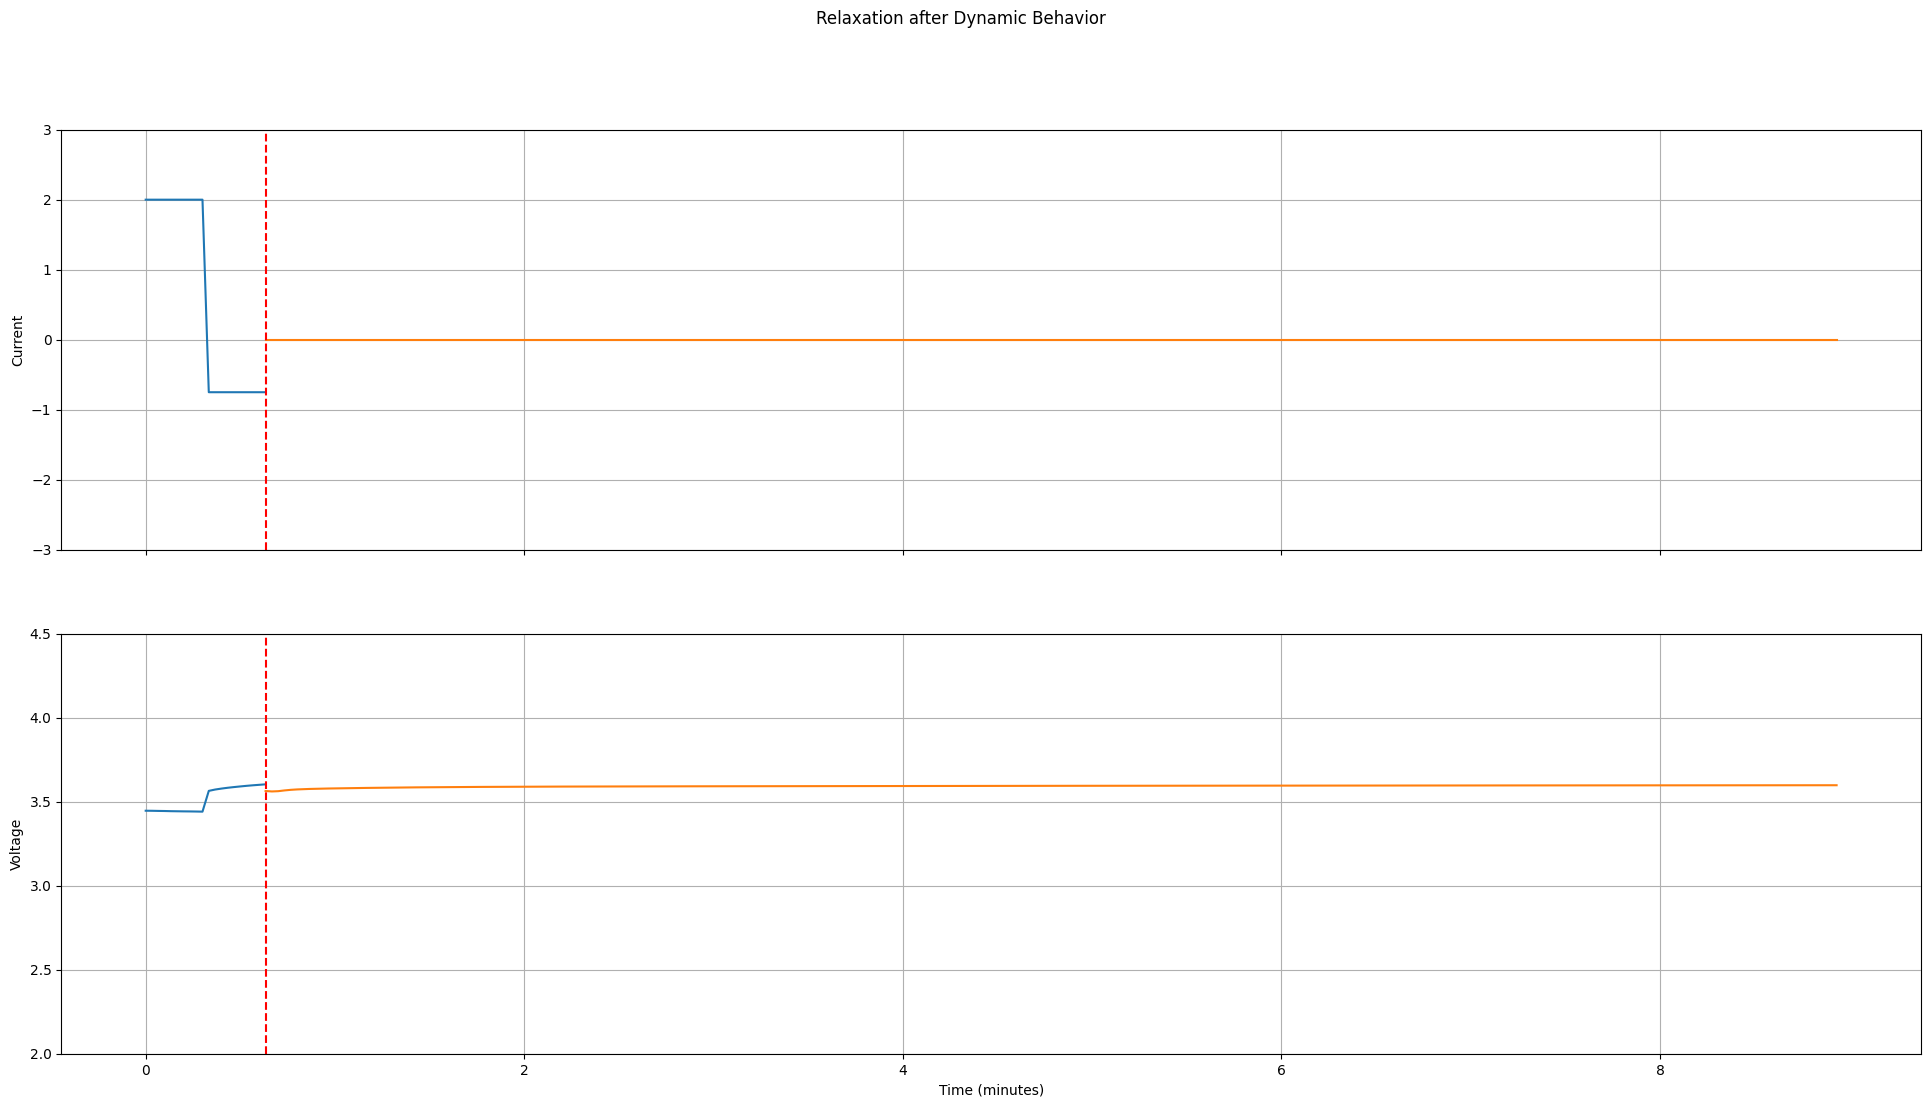

In [58]:
profile_path = curve_dir[5]
start = 3000
decoder_input_length = 250
from numpy.lib.stride_tricks import sliding_window_view

curve = pd.read_csv(profile_path, usecols=["voltage", "current"])

encoder_input = torch.tensor(
    curve[start:start + encoder_input_length].to_numpy(), dtype=torch.float
).unsqueeze(0)
# Apply MinMax Normalization -> [0,1]
curve["voltage"] = (curve["voltage"] - voltage_min) / (voltage_max - voltage_min)
curve["current"] = (curve["current"] - current_min) / (current_max - current_min)

encoder_input_normalized = torch.tensor(
    curve[start:start + encoder_input_length].to_numpy(), dtype=torch.float
).unsqueeze(0)

decoder_current = torch.full(
    size=(1, decoder_input_length, 1),
    fill_value=0,
    dtype=torch.float,
)
decoder_current_normalized = normalize(decoder_current, current_min, current_max)
rnn_model.eval()
with torch.inference_mode():
    predicted_voltage_normalized = rnn_model(encoder_input_normalized, decoder_current_normalized)
predicted_voltage = denormalize(predicted_voltage_normalized, voltage_min, voltage_max)
    

        
plot_prediction([encoder_input[:,:,1].detach().numpy().flatten()],
        [decoder_current.detach().numpy().flatten()],
        [encoder_input[:,:,0].detach().numpy().flatten()],
        [predicted_voltage.detach().numpy().flatten()],
        title="Relaxation after Dynamic Behavior")